In [1]:
from ML import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

### Reading Data

In [2]:
Data = pd.read_csv('data.csv',header=None)
Atoms = Data.iloc[:,0].values
serial = 0
index = []
for i in range(len(Atoms)):
    if Atoms[i].isdigit()==True:
        serial+=1/2
        if serial.is_integer()==True:
            index.append(i)

### Storing Data And Counting Atoms

In [3]:
AtomData = []
NonH = []

for i in range(len(index)-1):
    NH = 0
    AtomData.append(Data.iloc[index[i]:index[i+1]-1, 0:4].values)
    for j in range(index[i]+1,index[i+1]-1):
        if Atoms[j]!="H":NH+=1
            
    NonH.append(NH)
    
AtomData = np.array(AtomData,dtype=object)

In [4]:
AtomData[0]

array([['0001', -417.031, nan, nan],
       ['C', 1.04168, -0.0562, -0.07148],
       ['H', 2.15109, -0.0562, -0.0715],
       ['H', 0.67187, 0.17923, -1.09059],
       ['H', 0.67188, 0.70866, 0.64196],
       ['H', 0.67188, -1.05649, 0.23421]], dtype=object)

### Distribution of Non H atoms in Data

Elements in dictionary :\
1st element - no. of H atoms in a molecules\
2nd element - no. of molecules containting that no. of H atoms

In [5]:
NonHCounts = {i:NonH.count(i) for i in NonH}
NonHCounts # 1st element - no. of Non H atoms in a molecules
           # 2nd element - no. of molecules containting that no. of Non H atoms

{1: 1, 2: 3, 3: 12, 4: 43, 5: 157, 6: 935, 7: 5950}

### Number of molecule containing 4 or less non H atoms

In [6]:
N = sum(NonHCounts[i] for i in range(1,5))
# sort = lambda molecule : len(molecule) # sorting by number of atoms
# sorted(AtomData[N:],key=sort)

### Selecting 1 K molecules

i) First N (ie 59) molecules selected from atom data and then 1000-N (ie 941) molecules selected at random to make Training Data.

ii) Random molecules are selcted by creating mask for less than $\frac{1000-N}{len(AtomData[N:]}$ (ie 0.13362681056518036*100 % data which is 941 molecules) 

iii) Remainng Data is selected using the same mask

In [7]:
mask = np.load('mask1.npy')

In [91]:
# mask = Mask(len(AtomData[N:]),1000-N) # to select 941 molecules
RandomSample = AtomData[N:][mask]
RemainingSample = AtomData[N:][~mask]

# mask = Mask(len(RemainingSample),100)
# HoldOutSet = RemainingSample[mask]
# RemainingSample = RemainingSample[~mask]

In [92]:
# np.save("mask1",mask)

In [93]:
mask = np.load('mask2.npy')

In [94]:
# mask = Mask(len(RandomSample),100)
HoldOutSet = RandomSample[mask]
RandomSample = RandomSample[~mask]

In [95]:
# np.save("mask2",mask)

In [96]:
AtomDataTrain = np.concatenate((AtomData[0:N],RandomSample),dtype=object)
AtomDataRemaining = RemainingSample

In [97]:
len(HoldOutSet),len(AtomDataTrain),len(AtomDataRemaining)

(100, 900, 6101)

### Representation Matrix

In [98]:
VRCTrain,YTrain = RepresentationMatrix(AtomDataTrain)
VRCHoldOut,YHoldOut = RepresentationMatrix(HoldOutSet)

### Optimizing Kernel

In [17]:
# np.linspace(19000,21000,51)
# np.linspace(1,1.15,21)

In [74]:
Grid = []
for lam in np.linspace(1,1.2,10):
    for Sig in np.linspace(20000,300000,15):    
        Grid.append((lamm,Sig))

In [75]:
len(Grid)

150

In [18]:
ErrorArray = []
SigArray = []
lammArray = []
Error1 = 0
iterr = 0
for lamm,Sig in tqdm(Grid):
    iterr += 1
    Alpha = Model(VRCTrain,YTrain,Sig,lamm)
    YTest = Predict(VRCTrain,VRCHoldOut,Alpha,Sig)
    Error = np.sqrt(np.mean((YTest-YHoldOut)**2))
    
    ErrorArray.append(Error)
    SigArray.append(Sig)
    lammArray.append(lamm)
    
    if Error<=Error1:
        clear_output(wait=True)
        print("Error :",Error,"Sig :",Sig,"lamm :",lamm,"Iter :",iterr)
        
    Error1=Error

In [41]:
# np.save("Error",ErrorArray)
# np.save("Sig",SigArray)
# np.save("lamm",lammArray)

In [20]:
# idx = int(np.where(ErrorArray == min(ErrorArray))[0])
# Sig = SigArray[idx]
# lamm = lammArray[idx]
# print("Error :",ErrorArray[idx],"Sig :",Sig,"lamm :",lamm)

In [114]:
Sig = 24000
lamm = 1.01
Alpha = Model(VRCTrain,YTrain,Sig,lamm)
YTest = Predict(VRCTrain,VRCHoldOut,Alpha,Sig)
Error = np.sqrt(np.mean((YTest-YHoldOut)**2))
Error

172.58118764135259

In [55]:
# for i in range(len(YHoldOut)):
#     print(np.array(YHoldOut)[i],YTest[i])

In [107]:
grid = np.array([i for i in range(1,len(YTest)+1)])

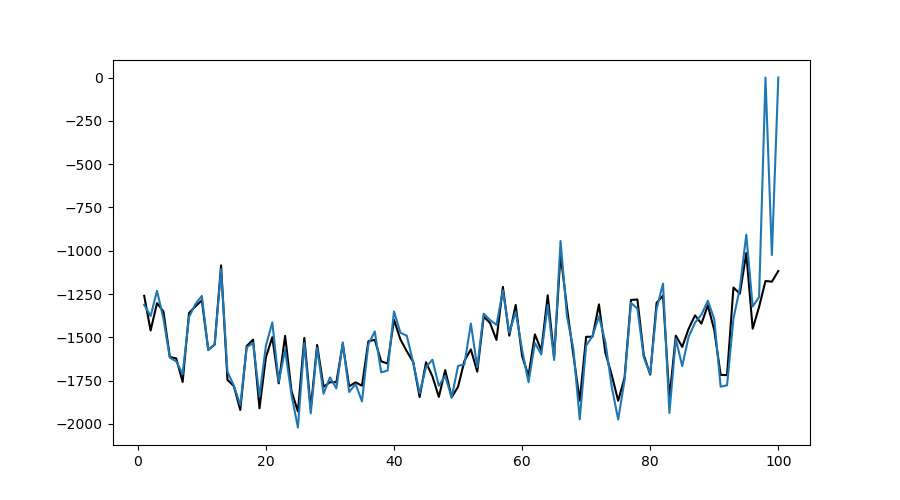

In [115]:
fig = plt.figure(figsize =(9, 5))
plt.plot(grid,YHoldOut,'k')
plt.plot(grid,YTest)

In [12]:
# Mij[:,0] # column
# Mij[[0,1]]=Mij[[1,0]] # row swap
# Mij[:, [1, 0]] = Mij[:, [0, 1]] # column swap

### Plot Molecule

In [1]:
j=500 # jth molecule

fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(111,projection ='3d')
for i in range(len(AtomData[j])):
               ax.scatter(AtomData[j][i][1],AtomData[j][i][2],AtomData[j][i][3],s=400,c='blue', alpha=0.5)

NameError: name 'plt' is not defined